# LE FEATURE INGENUERING

## Dans ce tp on sinterressera a l'éxploration données et a l'utilisations du framework tensorflow pour les reseaux de neurones artificiel

### L'objectif est de prédire le prix des maisons en fonction  des informations presents 

### commençons par importer les bibliothèque de visualisation de données

Colonnes Features (caractéristiques)

    id - ID unique pour chaque maison vendue
    date - Date de la vente de la maison
    price - Prix de chaque maison vendue
    bedrooms - Nombre de chambres
    bathrooms - Nombre de salles de bains, où 0,5 correspond à une chambre avec toilettes mais sans douche
    sqft_living - Superficie habitable
    sqft_lot - Superficie du terrain
    floors - Nombre d'étages
    waterfront - Une variable dummy (fictive) indiquant si l'appartement donnait sur le front de mer ou non
    view - Un indice de 0 à 4 de la qualité de la vue de la propriété
    condition - Un indice de 1 à 5 sur l'état de l'appartement
    grade - Un indice de 1 à 13, où 1-3 a un niveau de qualité faible de construction et de conception des bâtiments, 7 a un niveau moyen de construction et de conception, et 11-13 a un niveau de qualité élevé de construction et de conception
    sqft_above - La superficie de l'espace intérieur du logement qui est au-dessus du niveau du sol
    sqft_basement - La superficie de l'espace intérieur du logement qui se trouve sous le niveau du sol
    yr_built - L'année où la maison a été initialement construite
    yr_renovated - L'année de la dernière rénovation de la maison
    zipcode - Dans quelle zone de code postal se trouve la maison
    lat - Latitude
    long - Longitude
    sqft_living15 - La superficie de l'espace intérieur de l'habitation pour les 15 voisins les plus proches
    sqft_lot15 - La superficie du terrains des 15 voisins les plus proches


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Importons notre jeux de donnée

In [118]:
data = pd.read_csv("../DATA/kc_house_data.csv")


In [119]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [120]:
# la taille de notre jeux de donné et les variables
data.shape

(21597, 21)

In [121]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### info

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

###  La description

In [123]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Vérifions s'il y a des donnés manquants

In [124]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [125]:
data.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

#### Nous voyons les variables qui sont positivement et négativement correlées 

#### Observons la distribution entre le prix et la varible sqft_living

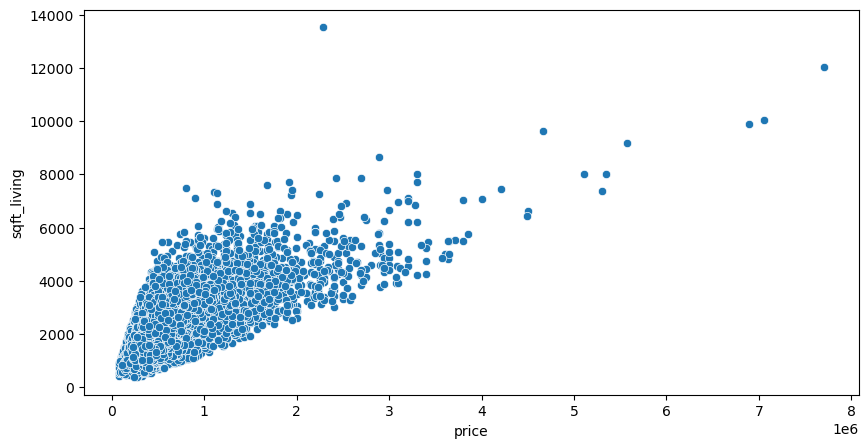

In [126]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = "price", y = "sqft_living", data = data)
plt.show()

plus la superfici est élévé, plus le prix est élevé

/home/totohuegnon/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


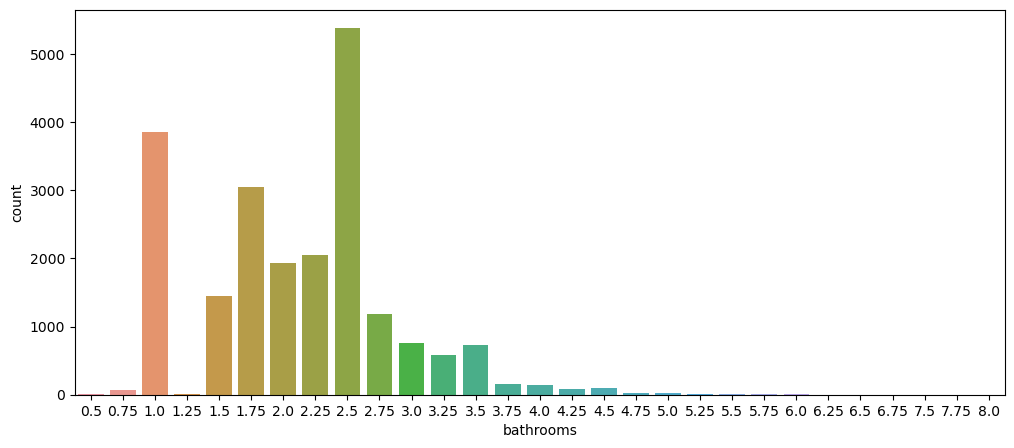

In [127]:
plt.figure(figsize=(12,5))
sns.countplot(data["bathrooms"], data = data)
plt.show()

il y a plus de chambre qui contient 5 salles de bains

### La relation entre la longitude et prix, la lattitude et le prix, la longitude et la latitude

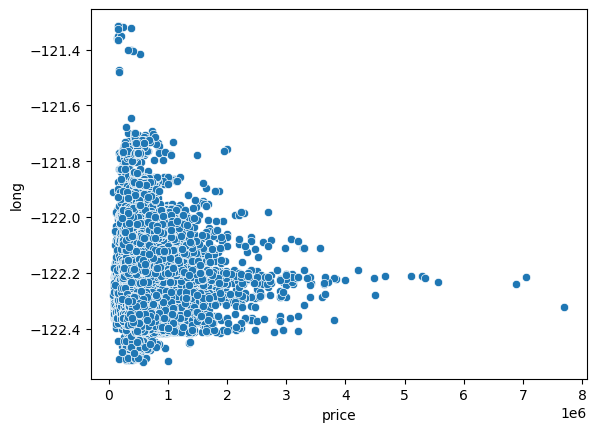

In [128]:
sns.scatterplot(y = 'long', x = "price", data= data)
plt.show()

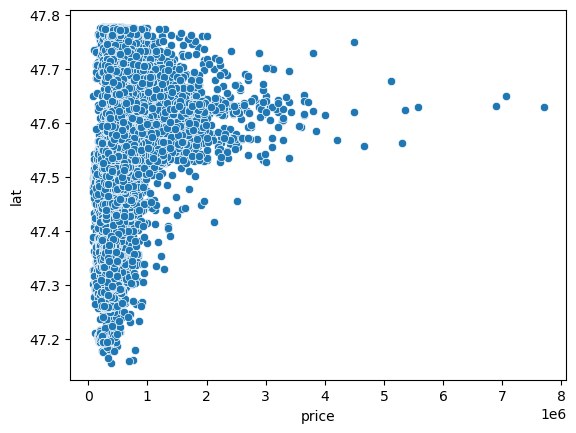

In [129]:
sns.scatterplot(y = 'lat', x = "price", data= data)
plt.show()

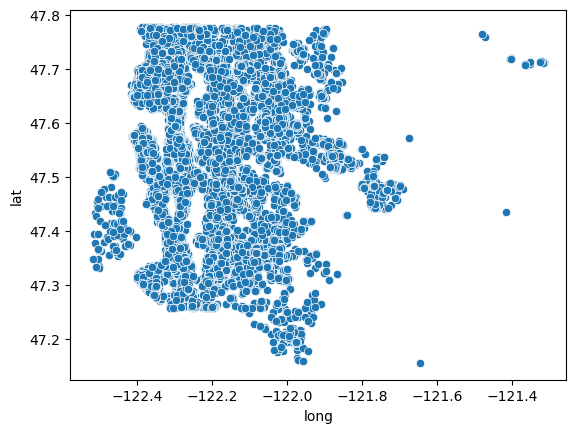

In [130]:
sns.scatterplot(x = 'long', y = "lat", data= data)
plt.show()

### Cette distritution n'est pas trop claire

 #### Astuce 
 Supprimons les valeurs extrêmes et appliquons une pallete de couleur aux point de nuage

je vais extraire 1% des valeurs extrêmes 


In [131]:
len(data)*0.01

215.97

In [132]:
nouveau_data = data.sort_values("price", ascending = False)[216:]

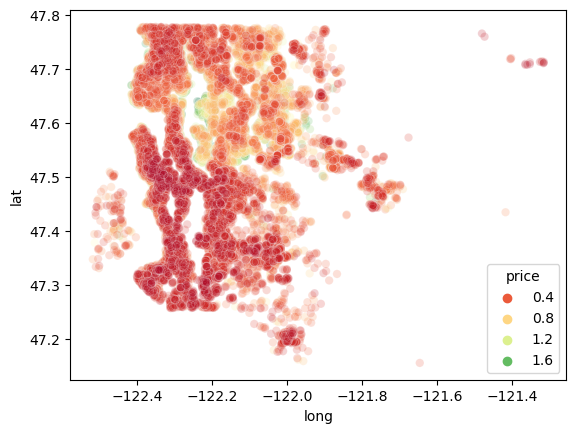

In [133]:
sns.scatterplot(x = 'long', y = "lat", data= nouveau_data, alpha=0.2, palette='RdYlGn',hue = 'price')
plt.show()

### les chambres les plus chaires se situe au bord des mer et sont en vert.confirmons cela avec une boite a moustache 

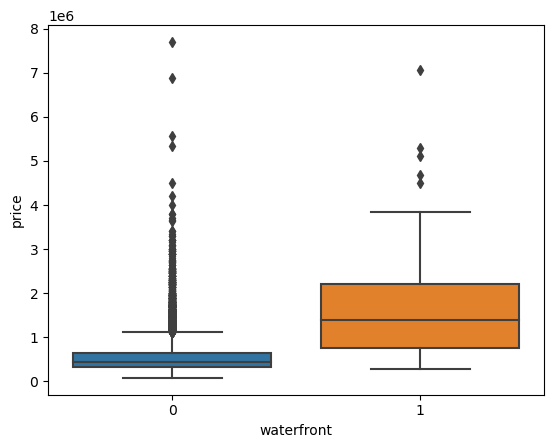

In [134]:
sns.boxplot(x = 'waterfront', y = "price", data = data)
plt.show()

#### Si oui ou non la maisons est proche de l'eau, le montant varie également

In [135]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### L'ID ne poura pas nous aidé à predire le prix de la maison, même si s'était le cas, nous ne pouvont l'intepreter dans ce cas. Donc on le supprime

In [136]:
data = data.drop("id", axis = 1)

In [137]:
data["date"]

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

#### Notre date est au format Objet, convertissont le au format de date

In [138]:
data['date'] = pd.to_datetime(data["date"])

In [139]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Explorons nos donnée en fonction de l'année et le jour. pour cela on fera une séparation en créant d'autre feature

In [140]:
data['year'] = data["date"].apply(lambda date: date.year)

In [141]:
data['month'] = data["date"].apply(lambda date: date.month)

#### Voyons un peu ce qui se passe sur chaque année

<AxesSubplot:>

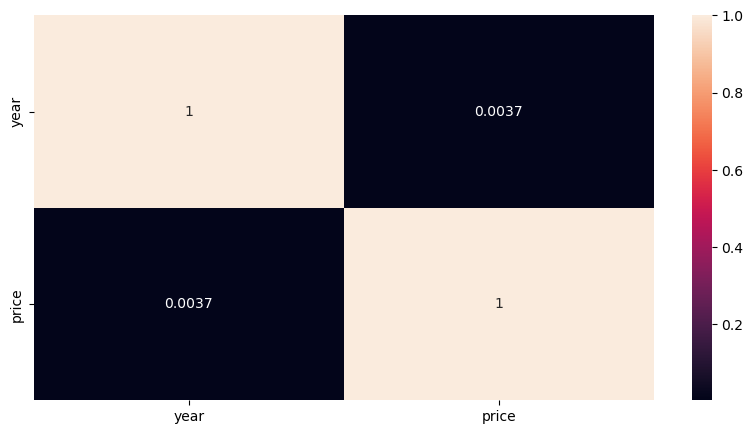

In [142]:
plt.figure(figsize=(10,5))
sns.heatmap(data[["year", "price"]].corr(), annot=True )

 Remarquons qu'il n'y a pas une grande variation entre le prix et l'année de vente des maisons

Nous n'avons pas les ressources nécessaires pour analiser la varibles zipcode
on va donc le supprimer

In [143]:
data = data.drop("zipcode", axis = 1)

Nous venons donc de finir le netoyage passons maintenant à l'etape d'entrainement test du model

# Entrainement test et mise à l'échelle des données

### Tensorflow n'utilise pas des dataframes mais plutôt un tableau nympy

In [158]:
X = data.drop(['price','date'], axis = 1).values
y = data["price"].values

## séparation entrainement test

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Pour eviter les futes de données, faisons une mise à l'echelle

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()

In [163]:
X_train = scaler.fit_transform(X_train)

In [164]:
X_test = scaler.transform(X_test)

## importation de Sequantial et Dense

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [167]:
Modele = Sequential()

### Création d'une couches d'entrer

In [ ]:
Modele.add(Dense(19, activation="relu"))

### Création de 19 couches cachés pour former le reseau de neurone

In [168]:
Modele.add(Dense(19, activation="relu"))
Modele.add(Dense(19, activation="relu"))
Modele.add(Dense(19, activation="relu"))

### la couche de sortie

In [169]:
Modele.add(Dense(1))
Modele.compile(optimizer= "adam",loss='mse', )

###  Entrainons le model sur les donnés d'entrainement

In [170]:
Modele.fit(x=X_train, y = y_train, validation_data=(X_test, y_test),batch_size = 120, epochs=400)

Epoch 1/400
126/126 [==============================] - 1s 4ms/step - loss: 430244593664.0000 - val_loss: 418948120576.0000
Epoch 2/400
126/126 [==============================] - 0s 3ms/step - loss: 429916618752.0000 - val_loss: 418053062656.0000
Epoch 3/400
126/126 [==============================] - 0s 3ms/step - loss: 427490082816.0000 - val_loss: 413482024960.0000
Epoch 4/400
126/126 [==============================] - 0s 3ms/step - loss: 419175563264.0000 - val_loss: 400698048512.0000
Epoch 5/400
126/126 [==============================] - 0s 3ms/step - loss: 399951822848.0000 - val_loss: 374686351360.0000
Epoch 6/400
126/126 [==============================] - 0s 3ms/step - loss: 365429850112.0000 - val_loss: 332354977792.0000
Epoch 7/400
126/126 [==============================] - 0s 3ms/step - loss: 314684145664.0000 - val_loss: 275411337216.0000
Epoch 8/400
126/126 [==============================] - 0s 3ms/step - loss: 252570583040.0000 - val_loss: 212219265024.0000
Epoch 9/400
126/

126/126 [==============================] - 0s 3ms/step - loss: 49006411776.0000 - val_loss: 47683862528.0000
Epoch 69/400
126/126 [==============================] - 0s 3ms/step - loss: 48747552768.0000 - val_loss: 47453495296.0000
Epoch 70/400
126/126 [==============================] - 0s 3ms/step - loss: 48501837824.0000 - val_loss: 47217029120.0000
Epoch 71/400
126/126 [==============================] - 0s 3ms/step - loss: 48274636800.0000 - val_loss: 46989688832.0000
Epoch 72/400
126/126 [==============================] - 0s 3ms/step - loss: 48041402368.0000 - val_loss: 46803361792.0000
Epoch 73/400
126/126 [==============================] - 0s 3ms/step - loss: 47838892032.0000 - val_loss: 46588522496.0000
Epoch 74/400
126/126 [==============================] - 0s 3ms/step - loss: 47614382080.0000 - val_loss: 46416056320.0000
Epoch 75/400
126/126 [==============================] - 0s 3ms/step - loss: 47431802880.0000 - val_loss: 46214942720.0000
Epoch 76/400
126/126 [===============

Epoch 135/400
126/126 [==============================] - 0s 3ms/step - loss: 39579181056.0000 - val_loss: 38528376832.0000
Epoch 136/400
126/126 [==============================] - 0s 3ms/step - loss: 39466799104.0000 - val_loss: 38400069632.0000
Epoch 137/400
126/126 [==============================] - 0s 3ms/step - loss: 39341416448.0000 - val_loss: 38274265088.0000
Epoch 138/400
126/126 [==============================] - 0s 3ms/step - loss: 39230660608.0000 - val_loss: 38150328320.0000
Epoch 139/400
126/126 [==============================] - 0s 3ms/step - loss: 39112486912.0000 - val_loss: 38039068672.0000
Epoch 140/400
126/126 [==============================] - 0s 3ms/step - loss: 39000911872.0000 - val_loss: 37915795456.0000
Epoch 141/400
126/126 [==============================] - 0s 3ms/step - loss: 38897909760.0000 - val_loss: 37798379520.0000
Epoch 142/400
126/126 [==============================] - 0s 3ms/step - loss: 38797619200.0000 - val_loss: 37696618496.0000
Epoch 143/400
12

126/126 [==============================] - 0s 3ms/step - loss: 34796908544.0000 - val_loss: 33573312512.0000
Epoch 202/400
126/126 [==============================] - 0s 3ms/step - loss: 34759233536.0000 - val_loss: 33551034368.0000
Epoch 203/400
126/126 [==============================] - 0s 3ms/step - loss: 34730344448.0000 - val_loss: 33502834688.0000
Epoch 204/400
126/126 [==============================] - 0s 3ms/step - loss: 34717913088.0000 - val_loss: 33460518912.0000
Epoch 205/400
126/126 [==============================] - 0s 3ms/step - loss: 34649276416.0000 - val_loss: 33420851200.0000
Epoch 206/400
126/126 [==============================] - 0s 3ms/step - loss: 34605969408.0000 - val_loss: 33409308672.0000
Epoch 207/400
126/126 [==============================] - 0s 3ms/step - loss: 34579566592.0000 - val_loss: 33356302336.0000
Epoch 208/400
126/126 [==============================] - 0s 3ms/step - loss: 34545397760.0000 - val_loss: 33312227328.0000
Epoch 209/400
126/126 [=======

126/126 [==============================] - 0s 2ms/step - loss: 33133604864.0000 - val_loss: 31723227136.0000
Epoch 268/400
126/126 [==============================] - 0s 3ms/step - loss: 33096390656.0000 - val_loss: 31713746944.0000
Epoch 269/400
126/126 [==============================] - 0s 2ms/step - loss: 33072617472.0000 - val_loss: 31712473088.0000
Epoch 270/400
126/126 [==============================] - 0s 3ms/step - loss: 33089456128.0000 - val_loss: 31664205824.0000
Epoch 271/400
126/126 [==============================] - 0s 2ms/step - loss: 33052375040.0000 - val_loss: 31675062272.0000
Epoch 272/400
126/126 [==============================] - 0s 2ms/step - loss: 33046382592.0000 - val_loss: 31625308160.0000
Epoch 273/400
126/126 [==============================] - 0s 4ms/step - loss: 33008687104.0000 - val_loss: 31598082048.0000
Epoch 274/400
126/126 [==============================] - 0s 3ms/step - loss: 33002289152.0000 - val_loss: 31575046144.0000
Epoch 275/400
126/126 [=======

126/126 [==============================] - 0s 3ms/step - loss: 32187023360.0000 - val_loss: 30592450560.0000
Epoch 334/400
126/126 [==============================] - 0s 3ms/step - loss: 32144427008.0000 - val_loss: 30621564928.0000
Epoch 335/400
126/126 [==============================] - 0s 3ms/step - loss: 32135790592.0000 - val_loss: 30568613888.0000
Epoch 336/400
126/126 [==============================] - 0s 3ms/step - loss: 32129202176.0000 - val_loss: 30562836480.0000
Epoch 337/400
126/126 [==============================] - 0s 2ms/step - loss: 32124280832.0000 - val_loss: 30549643264.0000
Epoch 338/400
126/126 [==============================] - 0s 2ms/step - loss: 32105580544.0000 - val_loss: 30526523392.0000
Epoch 339/400
126/126 [==============================] - 0s 3ms/step - loss: 32111742976.0000 - val_loss: 30533109760.0000
Epoch 340/400
126/126 [==============================] - 0s 3ms/step - loss: 32079929344.0000 - val_loss: 30501398528.0000
Epoch 341/400
126/126 [=======

126/126 [==============================] - 0s 2ms/step - loss: 31507097600.0000 - val_loss: 29870155776.0000
Epoch 400/400
126/126 [==============================] - 0s 3ms/step - loss: 31517499392.0000 - val_loss: 29794717696.0000


### Le model est bien entrainé. passons à l'évaluation du model et prediction

In [172]:
validation = pd.DataFrame(Modele.history.history)

In [174]:
validation

,loss,val_loss
0,4.302446e+11,4.189481e+11
1,4.299166e+11,4.180531e+11
2,4.274901e+11,4.134820e+11
3,4.191756e+11,4.006980e+11
4,3.999518e+11,3.746864e+11
...,...,...
395,3.153642e+10,2.984364e+10
396,3.153625e+10,2.984007e+10
397,3.154358e+10,2.982963e+10
398,3.150710e+10,2.987016e+10


<AxesSubplot:>

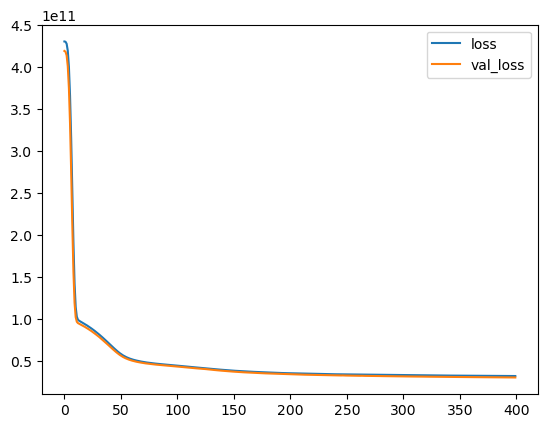

In [176]:
validation.plot()

##### Tout semble bien marché, nous n'avons pas un phénomème de surapprentissage


#### Examinons les rapports d'erreurs

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [178]:
prediction = Modele.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [179]:
mean_absolute_error(y_test, prediction)

105758.86834370178

In [180]:
np.sqrt(mean_squared_error(y_test, prediction))

172611.48360890715

In [181]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### les erreurs obtenues comparée au prix ne sont pas trop bonne mais ce n'est pas mauvais non plus. Faisons une étude approfondie avec les score de variance

In [182]:
explained_variance_score(y_test, prediction)

0.775342017315607

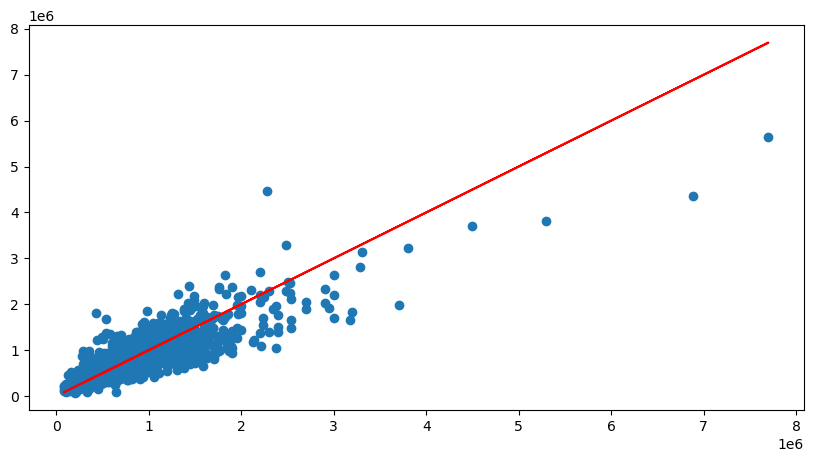

In [196]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')

### Il nous sera plus facile de predir les prix cmpris entre 0 et 2.10**6 $ 

#### Proposition de solution 
    

   ####                    -on entrainera le model sur 99% des donné en suprimant 1% des valeurs extrêmes
   ####                    - on verra bien si l'erreur va baissée

# Merci nous somme à la fin de ce TP 